# Tensorflow Einführung

Diese Einführung setzt vorraus, dass Tensorflow entweder mit oder ohne GPU Unterstützung bereits installiert ist.
Die schnellste und eine einfachste Lösung Tesorflow zu installieren ist der Konsolenbefehl "pip install tensorflow==1.15". Im Optimalfall sollte dies in einer getrennten virtuellen Umgebung stattfinden.

## Lineare Regression
Den Meisten von uns ist bewusst, dass Tensorflow ein tool zum Anwenden von Machine Learning Algorithmen ist. 
Allerdings ist des Pudels Kern eher eine für Paralell arbeitende Systeme optimierte Bibliothek, die außerdem Funktionen zum Implementieren von Machine Learning Algorithmen enthält.

Wir wollen zunächst mit einem mathematisch leicht greifbaren Problem beginnen. Die Lineare Regression. 
(Hinweis: mit Numpy oder Scipy wäre das Problem ebenso lösbar)




In [1]:
%config InlineBackend.figure_format = 'svg' #Stelle Jupyter auf svg Grafiken
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np    #numpy als np importieren
import matplotlib.pyplot as plt    #matplotlib.pyplot als plt importieren


ModuleNotFoundError: No module named 'tensorflow'

Gegeben ist eine Menge von Punkten, die sich durch eine Gerade appoximieren lässt.

In [6]:
n_samples = 30 #Anzahl der Punkte
#Linepace erzeugt Array mit n Äquidistanten Punkten im Intervall [0,20]
train_x = np.linspace(0,20, n_samples) 
#Y-Werte werden über Lineare Gleichung (hier: 3x) bestimmt 
#und durch eine Zufallszahl verschoben
train_y = 3*train_x + 4*np.random.randn(n_samples)

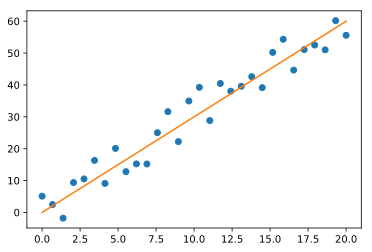

In [8]:
#PLots
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3*train_x)
plt.show()

Ziel einer linearen Regression ist es, die Gelbe Gerade auschlißelich durch Kenntnis der Lage der blauen Punkte zu bestimmen.

Dies möchten wir mit einem mathematischen Optimierungsverfahren erreichen (gradient decent).
Wir benötigen allerdings zunächst folgende Variablen:

In [10]:
#Placeholder sind übersetzt Platzhalter, 
#die nicht initialisiert werden müssen, da sie in der Regel als Input für das Training dienen
#Ihnen muss ein Typ übergeben werden, zudem kann man die Dimension und einen Namen festlegen.
X = tf.placeholder('float')
Y = tf.placeholder(tf.float32) #beide Float darstellungen sind equivalent

#Variablen hingegen müssen immer initialisiert sein, das geschieht durch den Konstruktor Parameter "np.random.randn()"
#Anmerkung: np.random ist das Zufallszahlenobjekt von numpy, randn steht für Zufallszahl aus Normalverteilung.
W = tf.Variable(np.random.randn(),name='weights')
B = tf.Variable(np.random.randn(),name='bias')

In [15]:
pred = X*W +B #Allgemeine Mathamtische Form einer Geraden
#pred = tf.add(tf.multiply(X,W),B) #äquivalent

cost = tf.reduce_sum((pred-Y)**2)/(2*n_samples) #Googlen, welche Funktion für Problem geeignet

learning_rate = 0.01 #stellt die schrittweite beim gradient descent ein
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost) #Opimierungsfunktion

In [12]:
#Alle Variablen initialisieren
init = tf.global_variables_initializer()

epoch:0000 c=26.5675 w=2.6542 b=-1.6601
epoch:0020 c=11.0346 w=3.0623 b=-1.4506
epoch:0040 c=10.8944 w=3.0516 b=-1.2854
epoch:0060 c=10.7683 w=3.0415 b=-1.1287
epoch:0080 c=10.6548 w=3.0320 b=-0.9799
epoch:0100 c=10.5527 w=3.0229 b=-0.8387
epoch:0120 c=10.4609 w=3.0142 b=-0.7046
epoch:0140 c=10.3783 w=3.0060 b=-0.5774
epoch:0160 c=10.3041 w=2.9983 b=-0.4566
epoch:0180 c=10.2373 w=2.9909 b=-0.3420


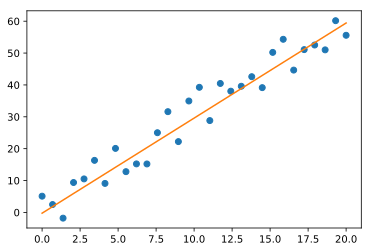

In [16]:

epochs = 200
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict = {X:x,Y:y})
        if not epoch % 20:
            c = sesh.run(cost, feed_dict = {X: train_x, Y:train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch:{epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
    weight = sesh.run(W)
    bias   = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)